$\textbf{Visibility Equation}$


For this work, we simulate a HERA core antenna array,  with antennas closely packed  located at the PAPER site, Karoo South Africa.  We simulate true sky visibility for point sources seen by a baseline $\mathbf{b}_{\textit{a}\textit{b}}$ at frequency $\nu$:
\begin{equation}
\textit{u}(\mathbf{b}_{\textit{a}\textit{b}},\nu)= \sum_{\textit{q}=1}^{\textit{N}_{\textrm{src}}} \textit{A}_{\textit{a}}^*(\hat{\mathbf{s}}_{\textit{q}},\nu)  \textit{A}_{\textit{b}}(\hat{\mathbf{s}}_{\textit{q}},\nu) \textit{S}_{\textit{q}}(\nu/\nu_0)^{-\alpha_{\textit{q}}} \textit{e}^{-2\pi j\frac{\nu}{\textit{c}}\mathbf{b}_{\textit{a}\textit{b}}\cdot \hat{\mathbf{s}}_{\textit{q}}}
\end{equation}
where  $\textit{A}_{\textit{a}}(\hat{\mathbf{s}}_{\textit{q}},\nu)$ and $\textit{A}_{\textit{b}}(\hat{\mathbf{s}}_{\textit{q}},\nu)$ are primary beam of antenna $\textit{a}$ and $\textit{b}$ measured at a point source location $\hat{\mathbf{s}}_{\textit{q}}$  with flux density $\textit{S}_{\textit{q}}$. Here $\nu_0$ and $\alpha_{\textit{q}}$ are the central frequency and spectral index of each point source. $^*$ complex conjugate and $j=\sqrt{-1}$

And observed visibility:
\begin{equation}
   \textit{v}(\mathbf{b}_{\textit{a}\textit{b}},\nu) = \textit{g}_{\textit{a}}(\nu)^{*}\textit{g}_{\textit{b}} \textit{u}(\mathbf{b}_{\textit{a}\textit{b}},\nu) + \textit{n}_{\textit{a}\textit{b}}(\nu)
\end{equation}
where $\textit{g}_{\textit{a}}$ and $\textit{g}_{\textit{b}}$ are the  directional indpendent eantenna gains. Here $\textit{n}_{\textit{a}\textit{b}}$ is the complex visibility noise, and is given by 

\begin{equation}
  \textit{n}_{\textit{a}\textit{b}}(\nu,\textit{t})=  < \sigma_{\textit{a}}(\nu,\textit{t})\sigma_{\textit{b}}^*(\nu,\textit{t})>
\end{equation}

where $\sigma_{\textit{a}}$ and $\sigma_{\textit{b}}$ are antenna noise defined as 
\begin{equation}\label{eq:radm}
    \sigma(\nu) = \frac{\textit{T}_{\textrm{sys}}(\nu,\textit{t})}{\sqrt{\Delta \nu \Delta \textit{t}}}
\end{equation}
where $\textit{T}_{\textrm{sys}}$ antenna system temperature, and $\Delta \nu$ and $\Delta \textit{t}$ are frequency bandwidth and time integration per observation, respectively. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utils
import time
from astropy.io import fits
import healpy as hp
import pandas as pd
import astropy.coordinates as coord
import astropy.units as u



$\textbf{GLEAM Calague 70-200 MHz}$

In [2]:
#loadinng GLEAM Calague 70-200 MHz
datafile = pd.read_csv('GLEAM_Catalogue_flux_above_15Jy_70_237MHz.csv')

df = pd.DataFrame(data=datafile)


In [22]:
#Inteportlated flux

flux_data = np.load('GLEAM_Catalogue_flux_above_15Jy_70_200MHz_interpolated.npy')


RA,DEC = np.load('GLEAM_Catalogue_flux_above_15Jy_70_200MHz_RA_DEC.npy')[0],np.load('GLEAM_Catalogue_flux_above_15Jy_70_200MHz_RA_DEC.npy')[1]

In [23]:
RA

array([5.74700096, 5.74999542, 6.27790848, 6.27956497, 5.87759278,
       5.73392967, 5.68783954, 6.17163887, 5.99109346, 6.2701826 ,
       5.5049395 , 5.52995443, 5.570241  , 5.82253009, 6.11317226,
       5.66243068, 5.87209866, 5.8635989 , 0.53330809, 1.08565483,
       1.0835965 , 1.13854224, 1.68763574, 1.68589695, 0.72840112,
       1.17424618, 0.18393009, 0.71446088, 0.28515219, 0.20188297,
       1.3650632 , 1.52455435, 0.41100122, 1.6891456 , 0.10691251,
       1.40919769, 1.17670343, 0.1126572 , 0.98838996, 0.52447237,
       0.48256333, 1.28822427, 1.24189688, 1.01084793, 0.29794334,
       1.28891117, 0.68821387, 0.35103109, 1.3549916 , 0.59172557,
       1.01004878, 1.08126777, 0.02781384, 0.16728257, 0.16173732,
       0.25123302, 1.01460012, 0.61479614, 0.93481737, 0.70980347,
       0.17819244, 0.82221157, 0.97520935, 1.44637966, 1.88951247,
       0.08908978, 0.30040087, 0.30076863, 1.04264594, 1.04225268,
       1.10687446, 1.40135776, 0.82905051, 0.42060637, 0.24363

$\textbf{GLEAM Bright Point Source Spartial Distribution}$

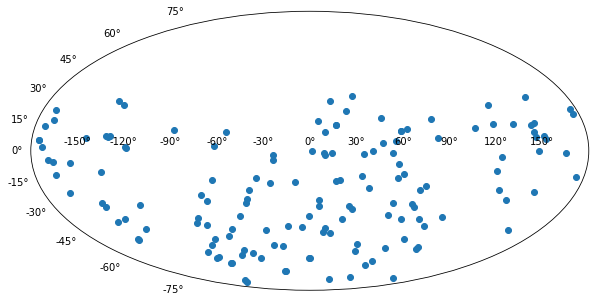

In [4]:

ra = coord.Angle(df['RAJ2000']*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(df['DEJ2000']*u.degree)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra.radian, dec.radian)

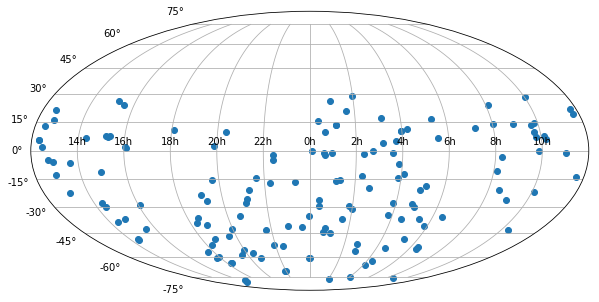

In [5]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra.radian, dec.radian)
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.grid(True)

$\textbf{#Integrated flux  at 151 MHz}$

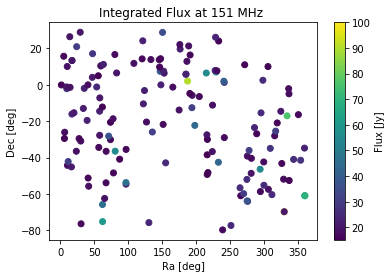

In [6]:
#Integrated flux 151 MHz
plt.title('Integrated Flux at 151 MHz ')
plt.scatter(df['RAJ2000'],df['DEJ2000'], c=df['int_flux_151'])
plt.xlabel('Ra [deg]')
plt.ylabel('Dec [deg]')
plt.colorbar(label ='Flux [Jy]')




$\textbf{Antenna Layout in ENU System}$

number of Antennas 61


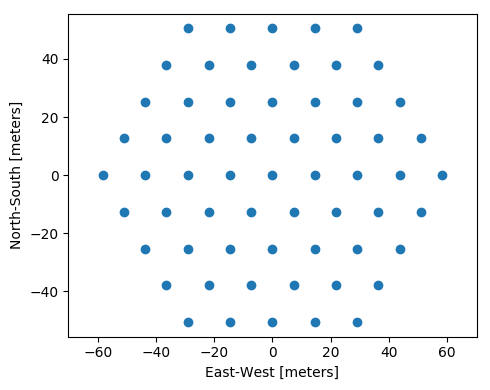

In [7]:
import antpos

antposs = antpos.hex_array(5,split_core= False, outriggers=0)

hera_hex_pos = np.array([list(pos) for pos in antposs.values()])

print 'number of Antennas', len(hera_hex_pos[:,0])

plt.figure(figsize=(5,4), dpi=100)
plt.scatter(hera_hex_pos[:,0],hera_hex_pos[:,1])
plt.xlabel("East-West [meters]")
plt.ylabel("North-South [meters]")
plt.axis('equal')
plt.tight_layout()

In [18]:
hera_hex_pos[0]

array([-29.2       ,  50.57588358,   0.        ])

$\textbf{Transform from ENU to XYZ}$


For a detailed discussion refer to lecture https://web.njit.edu/~gary/728/Lecture6.html


 \begin{gather}
 \begin{bmatrix} X  \\ Y \\ Z \end{bmatrix}
 =
  \begin{bmatrix}
   0 & -\sin(lat) &\cos(lat) \\
  1 & 0 & 0 \\
  0 & \cos(lat) & \sin(lat)
  \end{bmatrix} 
  \begin{bmatrix} E  \\ N \\ U \end{bmatrix}
\end{gather}


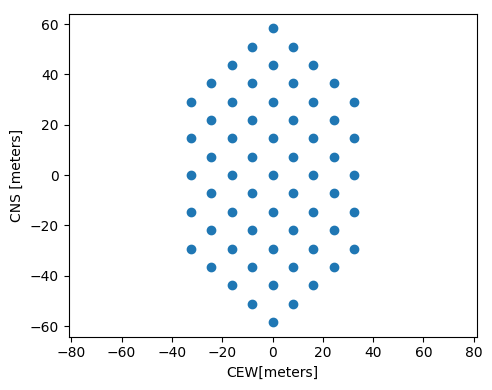

In [8]:
#E-N-U to XYZ Coordinates
#https://web.njit.edu/~gary/728/Lecture6.html

def XYZ_trans_mat(ENU_vec,lat):
    " This matrix transform antenna position from ENU to XYZ given the latitude"
    
    trans_mat = np.matrix([[0.0,-np.sin(lat),np.cos(lat)],[1.0,0.0,0.0],[0.0,np.cos(lat),np.sin(lat)]])
    XYZ =trans_mat.dot(ENU_vec)
    return np.array(XYZ)


#HERA latitude
lat = -30.722

XYZ_array = np.array([XYZ_trans_mat(hera_hex_pos[i],lat)[0] for i in range(len(hera_hex_pos))])

plt.figure(figsize=(5,4), dpi=100)
plt.scatter(XYZ_array[:,0],XYZ_array[:,1])
plt.xlabel("CEW[meters]")
plt.ylabel("CNS [meters]")
plt.axis('equal')
plt.tight_layout()





$\textbf{Computing Baseline Vectors}$


With 61 antennas there are 108 unique baselines.
1830 baselines


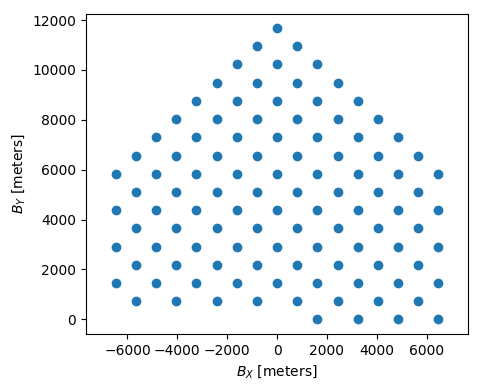

In [9]:
import get_ants_response

ants_indices = np.arange(len(XYZ_array))

ublDict = get_ants_response.InterferometricArray(XYZ_array,ants_indices).CalculateUBLs()[4] #computing Unique Baselines
print 61*60/2 ,"baselines"

B_xyz = np.array(ublDict.keys())

plt.figure(figsize=(5,4), dpi=100)
plt.scatter(B_xyz[:,0],B_xyz[:,1])
plt.xlabel(r"$B_X$ [meters]")
plt.ylabel(r"$B_Y$ [meters]")
plt.axis('equal')
plt.tight_layout()



$\textbf{Transform from $\textit{B}_{\textrm{XYZ}}$ to $\textit{uvw}$ }$


For a detailed discussion refer to lecture https://web.njit.edu/~gary/728/Lecture6.html

Below is direction cosine matrix transformation of $\textit{B}_{\textrm{XYZ}}$ to the direction peperndicular to the phase center ($\textit{h}_0,\delta_0$), thus forming $\textit{uvw}$ 


 \begin{gather} 
 \begin{bmatrix} \textit{u}  \\ \textit{v}\\ \textit{w} \end{bmatrix}
 =\frac{1}{\lambda}
  \begin{bmatrix}
   \sin\textit{h}_0 & \cos\textit{h}_0 & 0 \\
  -\sin\delta_0\cos\textit{h}_0 & sin\delta_0\sin\textit{h}_0 & \cos\delta_0 \\
  \cos\delta_0\cos\textit{h}_0 &-\cos\delta_0\sin\textit{h}_0 & \sin\delta_0
  \end{bmatrix} 
  \begin{bmatrix} \textit{B}_{\textit{X}}  \\ \textit{B}_{\textit{Y}} \\ \textit{B}_{\textit{Z}}\end{bmatrix}
\end{gather}


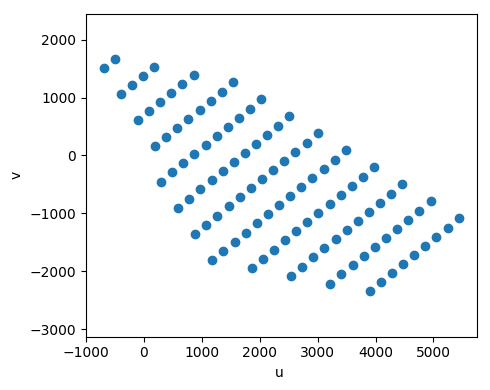

In [10]:
#Transform baseline to projected baseline

#phase center right above SKA karoor

#converting Long/Lat to RA/DEC https://lambda.gsfc.nasa.gov/toolbox/tb_coordconv.cfm

RA_0, Dec_0 = 21.41100,-30.72100 #degrees

def baseline_proj(bl_XYZ,RA_0,Dec_0):
    "Transform baseline to projected baseline given the phase center location in RA, DEC in degrees"
    trans_matt = np.matrix([[np.sin(np.deg2rad(RA_0)),np.cos(np.deg2rad(RA_0)),0.0],[-np.sin(np.deg2rad(Dec_0))*np.cos(np.deg2rad(RA_0)),np.sin(np.deg2rad(Dec_0))*np.sin(np.deg2rad(RA_0)),np.cos(np.deg2rad(Dec_0))],[np.cos(np.deg2rad(Dec_0))*np.cos(np.deg2rad(RA_0)),-np.cos(np.deg2rad(Dec_0))*np.sin(np.deg2rad(RA_0)),np.sin(np.deg2rad(Dec_0))]])
    bl_proj = trans_matt.dot(bl_XYZ)
    
    return np.array(bl_proj)


freq_mid =150e6 # Hz
wavelen = 3.0*10**8/freq_mid 
uvw = np.array([baseline_proj(B_xyz[i],RA_0,Dec_0)[0]*1.0/wavelen for i in range(len(B_xyz))])



plt.figure(figsize=(5,4), dpi=100)
plt.scatter(uvw[:,0],uvw[:,1])
plt.xlabel(r"u ")
plt.ylabel(r"v")
plt.axis('equal')
plt.tight_layout()



$\textbf{Section. 1.1 : Gaussian Primary Beam Model}$

The simplest primary beam model is Gaussain beam, it a good approximation of main lobe. It is a good enough to capture antenna-to-antenna variation due to pointing errors and spectral variation of ful l-width-half-maximum. A two dimensional Gaussian beam centered at origin (assuming the origin coincide with phase center) and   measure at angular co-ordinate $(\theta,\phi)$
\begin{equation}
        \textit{A}(\theta,\phi,\lambda)= \frac{1}{\sqrt{2\pi(\sigma(1+ \kappa))^2}}\textit{e}^{-\frac{(\theta + \varepsilon_{\theta})^2 + (\phi+ \varepsilon_{\phi})^2}{2(\sigma(1 +\kappa))^2}}
\end{equation}

where $\varepsilon_{\theta}$ and $\varepsilon_{\phi}$ are pointing errors, and $\kappa$ is a fractional error of the full-width-half-maximum. $\sigma$ is approximated from FWHM of ariy disk, 
\begin{equation}
        \sigma \approx 0.44\frac{\lambda}{\textit{D}}
\end{equation}

. Here $\textit{D}$ dish diameter.

reference

https://courses.lumenlearning.com/austincc-physics2/chapter/27-6-limits-of-resolution-the-rayleigh-criterion/


Text(0,0.5,'Normalized Power [Unitless]')

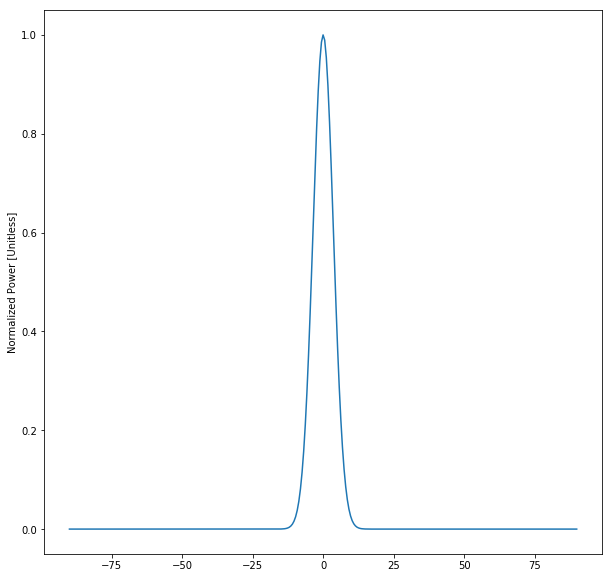

In [11]:
#1d Gaussain with and without beam size and point errors
import beam_simulator

freq_mid = 150e6
sigma_fwhm = beam_simulator.sigma_func(14.0,freq_mid)

theta, phi = np.arange(-np.pi/2.0,np.pi/2.0,0.01),np.arange(-np.pi,np.pi,0.1)

e_theta,e_phi = np.random.normal(0.0,np.deg2rad(0.2)), np.random.normal(0.0,np.deg2rad(0.2))  
kappa = np.random.normal(0.0,np.deg2rad(0.2)) # 
gaussian = [beam_simulator.gaussian_beam(theta[i],0.0,sigma_fwhm,0.0,0.0,0.0) for i in range(len(theta))]

plt.figure(figsize=(10,10))
plt.plot(np.rad2deg(theta),gaussian,label='Without Errors')
plt.ylabel('Normalized Power [Unitless]')


$\textbf{Visibility Simulation}$



In [12]:
def vis_sim_gaussain_beam(ublDict,Ant_pos,dish_diam,RA_0,DEC_0,RA,DEC,flux,freq,theta_error,phi_error,beam_size_error):
    
        sky_pos_r = [[np.cos(lalt_i)*np.cos(long_i), np.cos(lalt_i)*np.sin(long_i), np.sin(lalt_i)] for (lalt_i,long_i) in zip(DEC,RA)]
        Ant_index = np.arange(len(Ant_pos))
        #transforming antenna position from ENU to equatorial system XYZ
        lat = DEC_0
        XYZ = np.array([XYZ_trans_mat(Ant_pos[i],lat)[0] for i in range(len(Ant_pos))])
        
        #looping over redundant blocks
        vis_array ={}
        for redblock, ants_redblock in ublDict.iteritems():
            
            #computing visibility per baseline within redundant block
            vis_redblock=[]
            for bl_i in range(len(ants_redblock)):
                
                #computing the baseline and projecting it to the phase center\
                ant_1 = ants_redblock[bl_i][0]
                ant_2 = ants_redblock[bl_i][1]
                bl_xyz = XYZ[ant_2]- XYZ[ant_1]
                bl_xyz_proj = baseline_proj(bl_xyz,RA_0,DEC_0)
                
                
                #compute the visibility for all frequency
                vis =np.zeros(len(freq),dtype='complex')
                for freq_i in range(len(freq)):
                    
                    lambda_ = (3e8)/(freq[freq_i]*10**6)
                    sigma_fwhm = beam_simulator.sigma_func(dish_diam,freq[freq_i])
                    theta, phi = DEC, RA
                    
                    phase = np.array([np.exp(1j*2.0*np.pi*np.dot(bl_xyz_proj[0],sky_pos_r[r_i]/np.linalg.norm(sky_pos_r[r_i]))/lambda_)  for r_i in range(len(sky_pos_r))])
                    perceive_sky = np.array([flux[i][freq_i]*beam_simulator.gaussian_beam(theta[i],phi[i],sigma_fwhm,theta_error[ant_1],phi_error[ant_1],beam_size_error[ant_1])*beam_simulator.gaussian_beam(theta[i],phi[i],sigma_fwhm,theta_error[ant_2],phi_error[ant_2],beam_size_error[ant_2]) for i in range(theta.size)])
                    vis[freq_i] = np.sum(perceive_sky*phase)
                    
                vis_redblock.append(vis)
            
            vis_array[redblock] = vis_redblock
            
            
            
        return vis_array
    
    
    
                    
        
    
    
        
            
            
            
            
            
            
            


In [63]:

RA,DEC = np.deg2rad(df['RAJ2000']), np.deg2rad(df['DEJ2000'])
RA_0,DEC_0 = 21.41100,-30.72100
freq = np.arange(72.0,200.0,1.0)
nants = len(hera_hex_pos)

theta_error,phi_error,beam_size_error = np.random.randn(nants)*np.random.normal(0.0,np.deg2rad(0.001)), np.random.randn(nants)*np.random.normal(0.0,np.deg2rad(0.001)),  np.random.randn(nants)*np.random.normal(0.0,0.001)
t1 = time.time()
vis_data = vis_sim_gaussain_beam(ublDict,hera_hex_pos,14.0,RA_0,DEC_0,RA,DEC,flux_data,freq,theta_error*0,phi_error*0,beam_size_error*0)
t2 = time.time()

print 'time taken to simulate visbility with', nants*(nants-1)/2 ,'baselines and with', len(freq), 'channels is', t2-t1 

time taken to simulate visbility with 1830 baselines and with 128 channels is 2552.06027484


$\textbf{Non-redundant Visibility Simulation}$


In [25]:
datafile = np.load('SB_Visibilitity_simulation_GB_GLEAM_BSRC__position_error_1perc_72_200MHz.npy')



In [36]:
vis_rel_error = np.array(datafile[1])



5000

Text(0.5,0,'STD(Visibility Relative Error)')

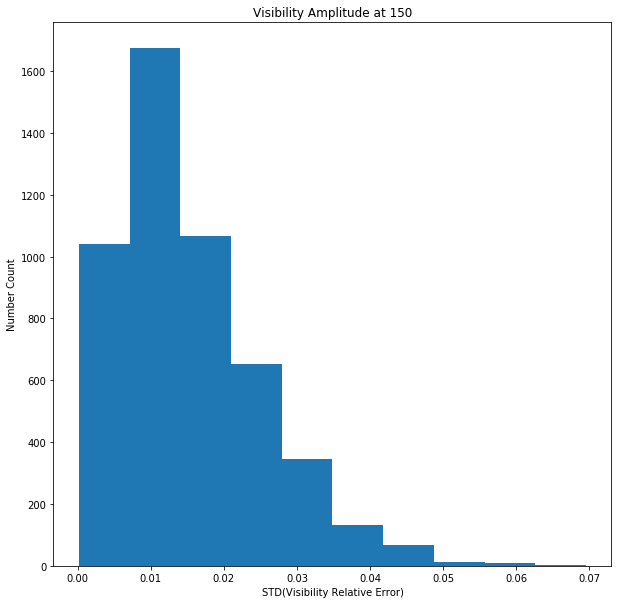

In [40]:
plt.figure(figsize=(10,10))
plt.title('Visibility Amplitude at 150')
plt.hist(np.abs(vis_rel_error[:,78]))
plt.ylabel('Number Count')
plt.xlabel(r'STD(Visibility Relative Error)')


Text(0.5,0,'STD(Visibility Relative Error)')

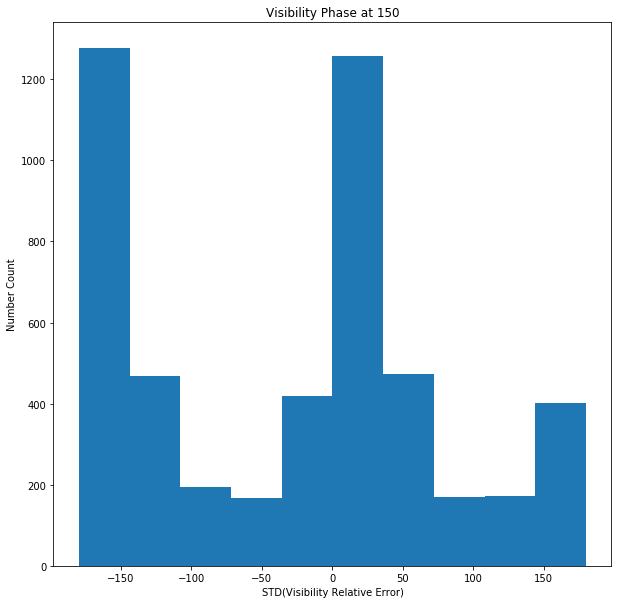

In [42]:
plt.figure(figsize=(10,10))
plt.title('Visibility Phase at 150')
plt.hist(np.angle(vis_rel_error[:,78],deg=True))
plt.ylabel('Number Count')
plt.xlabel(r'STD(Visibility Relative Error)')


128

5

In [41]:
#Water fall visibility


def vis_per_bl(bl_ind,antspos,ras,dec,src_flux,spec_ind,lst,freq,dy_i,dx_i,dy_j,dx_j,freq_mid =150.0):
    "This function compute visibility for NTIMES and NFREQS"
    
    vis = np.zeros((lst.size,freq.size),dtype='complex')
    
    for lst_i in range(lst.size):
        
        ha = [HA(lst_i,ras[i]) for i in range(ras.size)]
        sky_pos_r = [[np.cos(lalt_i)*np.cos(long_i), np.cos(lalt_i)*np.sin(long_i), np.sin(lalt_i)] for (lalt_i,long_i) in zip(decs,ha)]
        vis_lst_i = []
        for freq_i in range(freq.size):
            lambda_ = (3e8)/(freq[freq_i]*10**6)
            bl_ij = antspos[bl_ind[0]] - antspos[bl_ind[1]]
            phase = np.array([np.cos(2.0*np.pi*np.dot(bl_ij,sky_pos_r[r_i])/lambda_) + 1j*np.sin(2.0*np.pi*np.dot(bl_ij,sky_pos_r[r_i])/lambda_) for r_i in range(len(sky_pos_r))])
            perv_sky = np.array([fluxes[i]*np.power(freq[freq_i]/freq_mid,-spec_ind[i])*np.conj(get_ants_response.get_beam_single_pt(decs[i],ha[i],D_hera,h_feed,freq[freq_i],dy_i,dx_i)[1])*get_ants_response.get_beam_single_pt(decs[i],ha[i],D_hera,h_feed,freq[freq_i],dy_j,dx_j)[1] for i in range(decs.size)])
            vis_tmp = np.sum(perv_sky*phase)
            vis_lst_i.append(vis_tmp)
            
        vis[lst_i,:] = vis_lst_i
        
        
    return vis


HA = lambda lst,ra_obj: lst - ra_obj


hera_hex =  hera_hex_pos #np.load('hera_hex_positions.npy')
ants_indices = np.arange(len(hera_hex))
ublDict = get_ants_response.InterferometricArray(hera_hex,ants_indices).CalculateUBLs()[4]

ras,decs,fluxes,spec_ind = np.load('src_cat.npy')[0], np.load('src_cat.npy')[1], np.load('src_cat.npy')[2], np.load('src_cat.npy')[3]
dh = np.load('feed_positional_displacement_error.npy')

lsts = np.arange(0.0,2,1.63)
freq = np.arange(1)


vis_tmp = vis_per_bl(bl_ind[0],hera_hex,ras,decs,fluxes,spec_ind,lsts,freq,dh[bl_ind[0][0]][0],dh[bl_ind[0][0]][1],dh[bl_ind[0][1]][0],dh[bl_ind[0][1]][1])






With 127 antennas there are 234 unique baselines.


In [ ]:
nsample =100
lambda_ = 2.0

freq_mid = 150.0
spec_ind = spec_indices
bl_ij = [14.6,0.0,0.0]
sky_pos_r = [[np.cos(lalt_i)*np.cos(long_i), np.cos(lalt_i)*np.sin(long_i), np.sin(lalt_i)] for (lalt_i,long_i) in zip(decs,ras)]
phase = np.array([np.cos(2.0*np.pi*np.dot(bl_ij,sky_pos_r[r_i])/lambda_) + 1j*np.sin(2.0*np.pi*np.dot(bl_ij,sky_pos_r[r_i])/lambda_) for r_i in range(len(sky_pos_r))])
vis_diff =[]
vis_t =[]
for i in range(nsample):
    print i
    dy_j,dx_j = np.random.normal(0.0,0.25),np.random.normal(0.0,0.25)
    dy_i,dx_i = np.random.normal(0.0,0.1),np.random.normal(0.0,0.1)
    sky = np.array([fluxes[i]*np.power(150.0/freq_mid,-spec_ind[i])*np.conj(get_ants_response.get_beam_single_pt(decs[i],ras[i],D_hera,h_feed,150,dy_i,dx_i)[1])*get_ants_response.get_beam_single_pt(decs[i],ras[i],D_hera,h_feed,150,dy_j,dx_j)[1] for i in range(decs.size)])
    sky_true = np.array([fluxes[i]*np.power(150.0/freq_mid,-spec_ind[i])*np.conj(get_ants_response.get_beam_single_pt(decs[i],ras[i],D_hera,h_feed,150,0.0,0.0)[1])*get_ants_response.get_beam_single_pt(decs[i],ras[i],D_hera,h_feed,150,0.0,0.0)[1] for i in range(decs.size)])
    vis_true = np.sum(phase*sky_true)
    vis_error = np.sum(phase*sky)
    vis_diff.append(vis_true - vis_error)
    vis_t.append(np.abs(vis_t))
vis_frac_err = (np.abs(np.mean(vis_diff))**2)/np.mean(np.abs(vid_t)**2)  


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [40]:
bl_ind[0][1]

69

In [47]:
bl        
    
    
sky_pos_r = [[np.cos(lalt_i)*np.cos(long_i), np.cos(lalt_i)*np.sin(long_i), np.sin(lalt_i)] for (lalt_i,long_i) in zip(decs,ha)]
vis_lst_i = []
for freq_i in range(freq.size):
            lambda_ = (3e8)/(freq[freq_i]*10**6)
            bl_ij = antspos[bl_ind[0]] - antspos[bl_ind[1]]
            phase = np.array([np.cos(2.0*np.pi*np.dot(bl_ij,sky_pos_r[r_i])/lambda_) + 1j*np.sin(2.0*np.pi*np.dot(bl_ij,sky_pos_r[r_i])/lambda_) for r_i in range(len(sky_pos_r))])
            perv_sky = np.array([fluxes[i]*np.power(freq[freq_i]/freq_mid,-spec_ind[i])*np.conj(get_ants_response.get_beam_single_pt(decs[i],ha[i],D_hera,h_feed,freq[freq_i],dy_i,dx_i))*get_ants_response.get_beam_single_pt(decs[i],ha[i],D_hera,h_feed,freq[freq_i],dy_j,dx_j) for i in range(decs.size)])
            vis_tmp = np.sum(perv_sky*phase)
            vis_lst_i.append(vis_tmp)
            

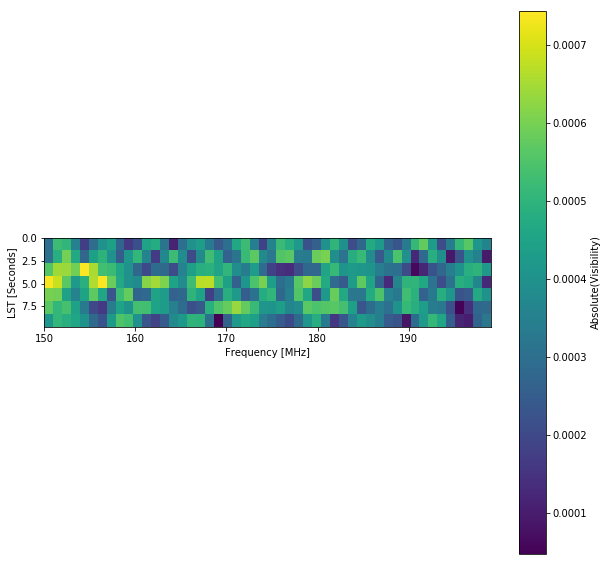

In [32]:
extent =[freq[0],freq[-1],lsts[-1],lsts[0]]

plt.figure(figsize =(10,10))
plt.imshow(np.abs(vis_tmp),extent=extent)
plt.xlabel('Frequency [MHz]')
plt.ylabel('LST [Seconds]')
plt.colorbar(label= r'Absolute(Visibility)')




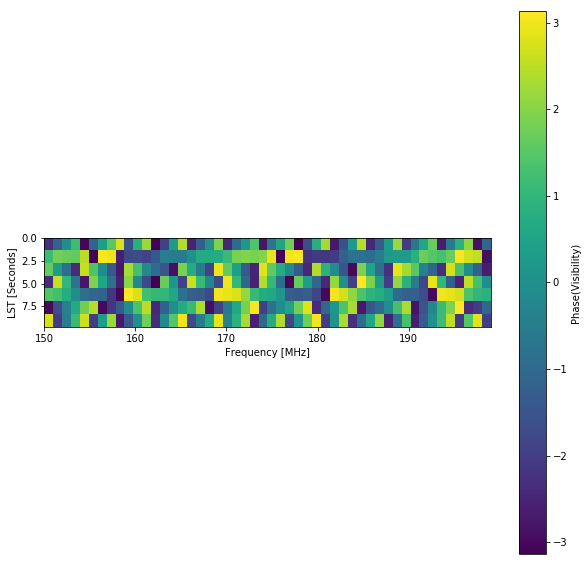

In [33]:
extent =[freq[0],freq[-1],lsts[-1],lsts[0]]

plt.figure(figsize =(10,10))
plt.imshow(np.angle(vis_tmp),extent=extent)
plt.xlabel('Frequency [MHz]')
plt.ylabel('LST [Seconds]')
plt.colorbar(label= r'Phase(Visibility)')




Text(0,0.5,'Amplitude(Visibility)')

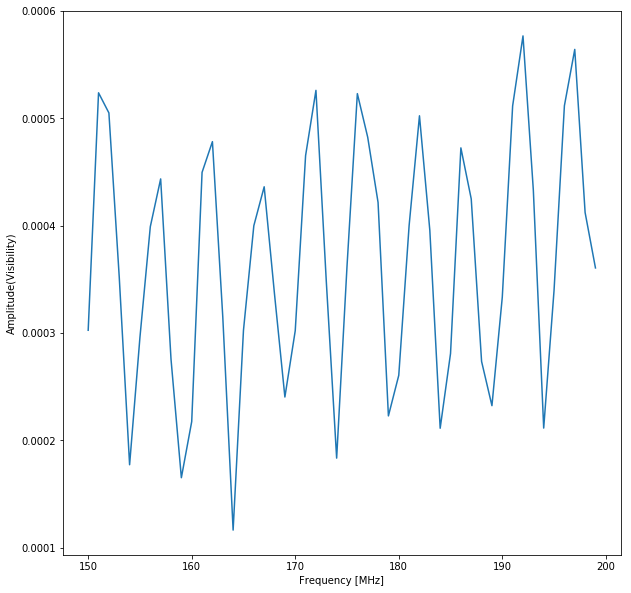

In [40]:
vis_tmp = np.array(vis_tmp)
plt.figure(figsize=(10,10))
plt.plot(freq,np.abs(vis_tmp[0]))
plt.xlabel('Frequency [MHz]')
plt.ylabel('Amplitude(Visibility)')


Text(0,0.5,'Phase(Visibility)')

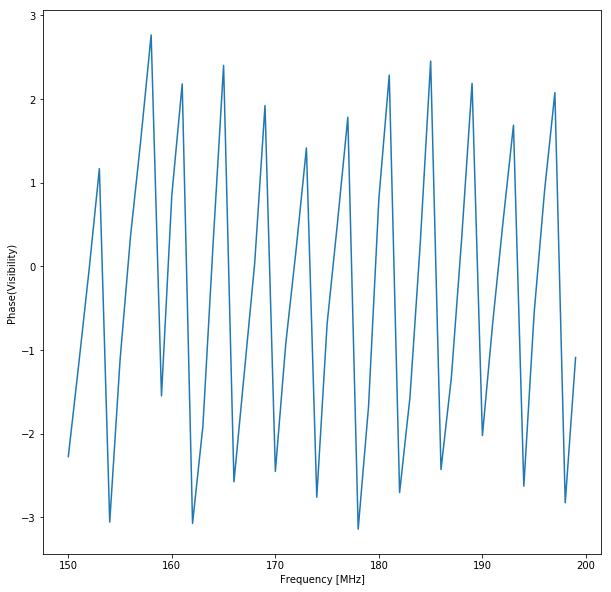

In [41]:
vis_tmp = np.array(vis_tmp)
plt.figure(figsize=(10,10))
plt.plot(freq,np.angle(vis_tmp[0]))
plt.xlabel('Frequency [MHz]')
plt.ylabel('Phase(Visibility)')

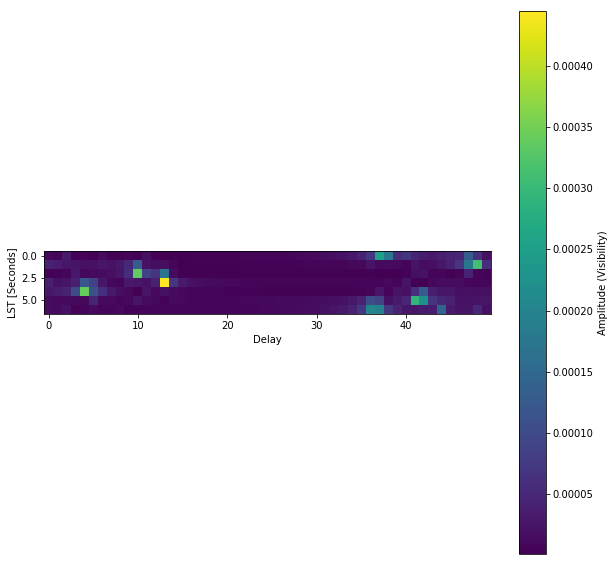

In [43]:
#delay data sim

vis_delay = np.array([np.fft.ifft(vis_tmp[i]) for i in range(vis_tmp.shape[0])])

extent =[freq[0],freq[-1],lsts[-1],lsts[0]]

plt.figure(figsize =(10,10))
plt.imshow(np.abs(vis_delay))
plt.xlabel('Delay')
plt.ylabel('LST [Seconds]')
plt.colorbar(label= r'Amplitude (Visibility)')